# SYNTHETIC DATASET GENERATION 

In [1]:
import os
import sys
sys.path.append('../../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
from matplotlib import pyplot as plt

2024-03-12 17:28:38.176901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training Set 

In [2]:
def generate_random_points_in_ball(size, dimensions, radius):
    if dimensions <= 0 or radius <= 0:
        raise ValueError("Dimensions and radius must be positive values.")
    
    points = []
    
    while len(points) < size:
        point = np.random.uniform(low=-radius, high=radius, size=dimensions)
        if np.linalg.norm(point) <= radius:
            points.append(point)
            
    return points

In [3]:
# Example usage
size = 1000
dimensions = 6
radius = 5.0

X_train = np.array(generate_random_points_in_ball(size, dimensions, radius))

## Synthetic Anomaly Interval

In [4]:
anomaly_interval=[7,12]
anomaly_interval_2=[np.sqrt(49/2),np.sqrt(144/2)]
anomaly_interval_3=[np.sqrt(49/3),np.sqrt(144/3)]
anomaly_interval_6=[np.sqrt(49/6),np.sqrt(144/6)]

In [13]:
anomaly_interval=[5,10]
anomaly_interval_2=[np.sqrt(25/2),np.sqrt(100/2)]
anomaly_interval_3=[np.sqrt(25/3),np.sqrt(100/3)]
anomaly_interval_6=[np.sqrt(25/6),np.sqrt(100/6)]

## Xaxis

In [5]:
def generate_x_axis(size,min,max):
    x=np.random.uniform(min,max,size=size)
    y=np.random.normal(0,1,size=(x.shape[0],5))
    xy=np.column_stack((x,y))
    return xy

In [8]:
xy1=generate_x_axis(int((0.1*X_train.shape[0])/2),anomaly_interval[0],anomaly_interval[1])
xy2=generate_x_axis(int((0.1*X_train.shape[0])/2),-anomaly_interval[1],-anomaly_interval[0])
X_xaxis=np.row_stack((xy1,xy2))
X_xaxis.shape

(100, 6)

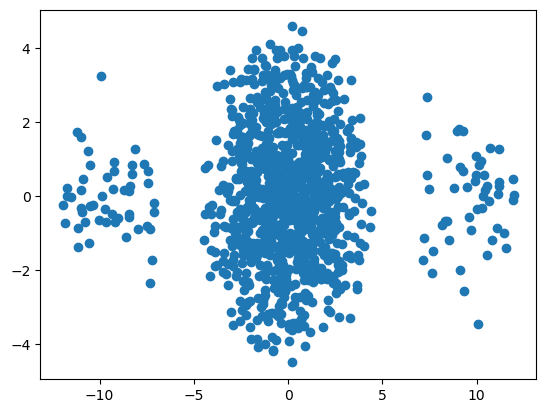

In [9]:
Xaxis=np.r_[X_train,X_xaxis]
plt.plot(Xaxis[:,0],Xaxis[:,1],'o')

In [10]:
y_train = np.zeros(X_train.shape[0])
y_test = np.ones(X_xaxis.shape[0])
y=np.concatenate((y_train,y_test))

In [15]:
X=np.c_[Xaxis,y]
df=pd.DataFrame(X)
df=df.rename(columns={6:'Target'})
df.head()

,0,1,2,3,4,5,Target
0,-0.731186,-1.385350,-0.178168,-1.833251,-3.261717,0.252484,0.0
1,3.208072,0.071575,-0.147956,0.871928,1.557336,1.766276,0.0
2,3.306013,1.360201,2.452319,1.258482,-0.176678,-1.281672,0.0
3,0.523361,-0.453477,1.757587,2.057864,1.908394,2.106112,0.0
4,3.328303,3.136135,-1.148419,-0.113742,0.015016,-0.966332,0.0


# Generate Dataset for Time Scaling Experiments

In [19]:
def generate_dataset(size=100,anomaly_interval=[5,10],dimensions=6,path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/',filename='Xaxis'):
    X_train = np.array(generate_random_points_in_ball(size, dimensions, radius=5))
    xy1=generate_x_axis(int((0.1*X_train.shape[0])/2),anomaly_interval[0],anomaly_interval[1])
    xy2=generate_x_axis(int((0.1*X_train.shape[0])/2),-anomaly_interval[1],-anomaly_interval[0])
    X_xaxis=np.row_stack((xy1,xy2))
    X=np.r_[X_train,X_xaxis]
    y_train = np.zeros(X_train.shape[0])
    y_test = np.ones(X_xaxis.shape[0])
    y=np.concatenate((y_train,y_test))
    X=np.c_[X,y]
    df=pd.DataFrame(X)
    df=df.rename(columns={6:'Target'})
    df.to_csv(path+f'{filename}_{size}_{dimensions}'+'.csv')

In [29]:
for sample_size in [500,1000,2500,5000,10000,25000,50000,100000,250000,300000]:
    generate_dataset(size=sample_size)

In [30]:
data=pd.read_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/Xaxis_300000_6.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,0,1,2,3,4,5,Target
0,0.431900,-0.492569,0.795829,3.085690,1.002188,1.582941,0.0
1,2.953267,-0.720762,1.202530,-0.738556,-0.960131,2.333458,0.0
2,1.499917,3.299748,-0.671680,-0.121652,0.415131,0.266336,0.0
3,1.443636,1.960753,1.846305,-0.375685,3.763709,-0.923915,0.0
4,1.790564,0.533289,-1.150783,0.165802,-2.287399,-3.005372,0.0


In [31]:
data.shape

(330000, 7)

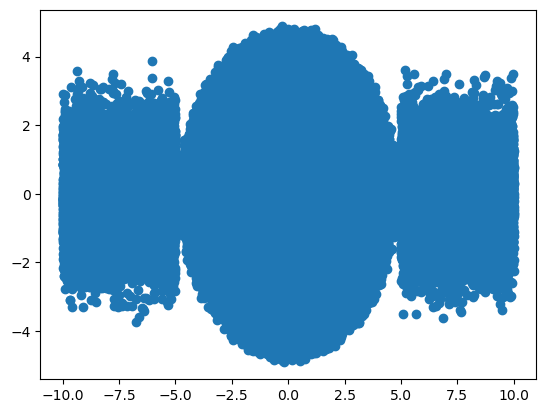

In [32]:
plt.plot(data.iloc[:,0],data.iloc[:,1],'o')

## Yaxis

In [3]:
def generate_y_axis(size,min,max):
    x=np.random.normal(0,1,size=size)
    y=np.random.uniform(min,max,size=x.shape[0])
    xy=np.column_stack((x,y))
    z=np.random.normal(0,1,size=(x.shape[0],4))
    xyz=np.column_stack((xy,z))
    return xyz

In [22]:
xy1=generate_y_axis(50,anomaly_interval[0],anomaly_interval[1])
xy2=generate_y_axis(50,-anomaly_interval[1],-anomaly_interval[0])
X_yaxis=np.row_stack((xy1,xy2))
X_yaxis.shape

(100, 6)

## Bisect Anomalies

Changing the input parameter d it's possible to choose the dimensionality of the bisect anomaly. The values of d used in the paper were d=2,3,6.

In [4]:
def bisect(size,min,max,d,dim=6):
    data=np.zeros(shape=(size,dim))
    data[:,0]=np.random.uniform(min,max,size=size)
    for i in range(1,d):
        data[:,i]=data[:,0]+np.random.normal(0,1,size=size)

    for i in range(d,dim):
        data[:,i]=np.random.normal(0,1,size=size)

    return data

In [10]:
X_bisect=np.row_stack((bisect(50,5,10,2),bisect(50,-10,-5,2)))
X_bisect_3d=np.row_stack((bisect(50,5,10,3),bisect(50,-10,-5,3)))
X_bisect_4d=np.row_stack((bisect(50,5,10,4),bisect(50,-10,-5,4)))
X_bisect_6d=np.row_stack((bisect(50,5,10,6),bisect(50,-10,-5,6)))

In [25]:
os.chdir('c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data\\diffi_data')
os.getcwd()

'c:\\Users\\lemeda98\\Desktop\\PHD Information Engineering\\ExIFFI\\ExIFFI\\data\\diffi_data'

In [11]:
d={
    'X_xaxis': X_xaxis,
    'X_yaxis': X_yaxis,
    'X_bisect': X_bisect,
    'X_bisect_3d': X_bisect_3d,
    'X_bisect_6d': X_bisect_6d
}

file_to_read = os.getcwd()+'\\syn_test_anomaly_interval_5_10.pkl'
with open(file_to_read, 'wb') as file:
    pickle.dump(d,file)